## <a name='Introduction'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.1. Introduction</h3>
</div>

**What is Customer Churn?**

Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Customer churn is extremley costly for companies. Based on a churn rate just under two percent for top companies, one source estimates carriers lose $65 million per month from churn. To reduce customer churn, telecom companies should predict which customers are highly prone to churn.

Individualized customer retention is demanding because most companies have a large number of customers and cannot afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could concentrate customer retention efforts only on these "high risk" clients.

## <a name='Obejctives'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.2. Obejctives</h3>
</div>

In this projects below questions will be answered:

* What's the $\%$ of  Customers Churn and customers that keep in with the active services?
* Is there any patterns in Customers Churn based on the gender?
* Is there any patterns/preference in Customers Churn based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Which features have the most impact on predicting customers churn?
* Which model is the best for predicting churn?

## <a name='Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.3. Dataset Features</h3>
</div>

*   `Customer ID`: A unique ID that identifies each customer.

Demographic info about customers:

*   `gender`: Whether the customer is a male or a female

*   `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)

*   `Partner`: Whether the customer has a partner or not (Yes, No)

*   `Dependents`: Whether the customer has dependents or not (Yes, No)

Services that each customer has signed up for:

*   `PhoneService`: Whether the customer has a phone service or not (Yes, No)

*   `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)

*   `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)

*   `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)

*  ` OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)

*   `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)

*   `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)

*   `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)

*   `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)

Customer account information:

*   `tenure`: Number of months the customer has stayed with the company

*   `Contract`: The contract term of the customer (Month-to-month, One year, Two year)

*   `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

*   `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

*   `MonthlyCharges`: The amount charged to the customer monthly

*   `TotalCharges`: The total amount charged to the customer

*   **`Churn`**: Target, Whether the customer has left within the last month or not (Yes or No)

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [1]:
!pip install mlens

In [ ]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import BorderlineSMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier

# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('Telco Customer Churn.csv')

# <a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Handling Missing Values</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

let's find if we have missing values in the dataset. 

In [ ]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

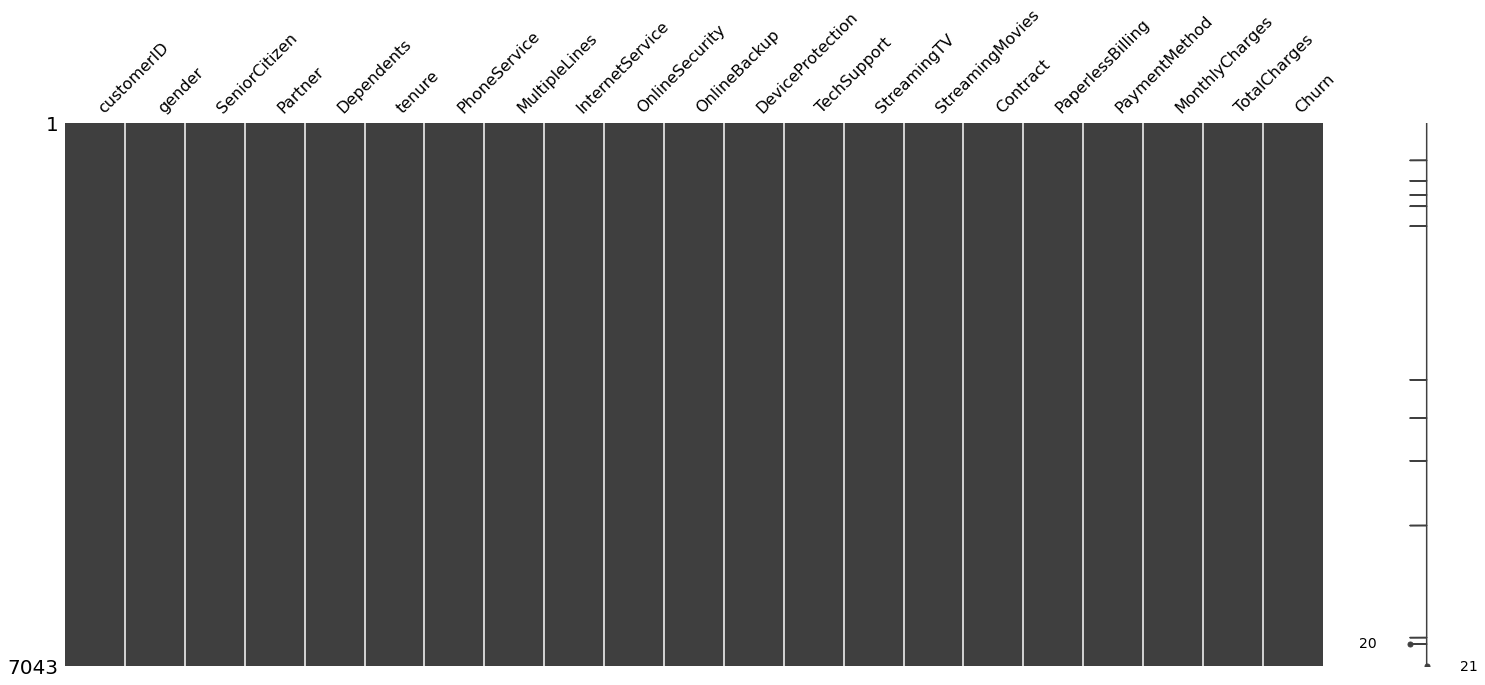

In [ ]:
msno.matrix(data);

If we examine the data carefully, we can actually estimate the value of the missing data. 

Contract length in month * tenure (if not 0) * monthly charges

This is more accurate than filling missing values with mean or median.

In [ ]:
data[data['TotalCharges'].isnull()].index.tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [ ]:
ind = data[data['TotalCharges'].isnull()].index.tolist()
for i in ind:
  if data['Contract'].iloc[i,] == 'Two year':
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 24
  elif data['Contract'].iloc[i,] == 'One year':
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,] * 12
  else:
    data['TotalCharges'].iloc[i,] = int(np.maximum(data['tenure'].iloc[i,], 1)) * data['MonthlyCharges'].iloc[i,]

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

let's find if we have duplicate rows.

In [ ]:
data.duplicated().sum()

0

# <a name='Data_Analysis_and_Visualization'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Data Analysis and Visualization</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
data.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  
2              Yes      Mailed check           53.85       108.15   Yes

In [ ]:
data.shape

(7043, 21)

There are 7043 cutomers and 21 features in the dataset.

In [ ]:
for i in data.columns[6:-3]:
  print(f'Number of categories in the variable {i}: {len(data[i].unique())}')

Number of categories in the variable PhoneService: 2
Number of categories in the variable MultipleLines: 3
Number of categories in the variable InternetService: 3
Number of categories in the variable OnlineSecurity: 3
Number of categories in the variable OnlineBackup: 3
Number of categories in the variable DeviceProtection: 3
Number of categories in the variable TechSupport: 3
Number of categories in the variable StreamingTV: 3
Number of categories in the variable StreamingMovies: 3
Number of categories in the variable Contract: 3
Number of categories in the variable PaperlessBilling: 2
Number of categories in the variable PaymentMethod: 4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
data.describe(include=object).T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6541              20.2    11
Churn             7043      2                No  5174

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['gender'].unique(), values=data['gender'].value_counts(), name='Gender', 
                     marker_colors=['gold', 'mediumturquoise']), 1, 1)
fig.add_trace(go.Pie(labels=data['Churn'].unique(), values=data['Churn'].value_counts(), name='Churn', 
                     marker_colors=['darkorange', 'lightgreen']), 1, 2)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Gender and Churn Distributions<b>', 
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.8, y=0.5, font_size=20, showarrow=False)])
iplot(fig)

* We have imbalanced data.

* $26.6 \%$ of customers switched to another company.

* Customers are $49.5 \%$ female and $50.5 \%$ male.

In [ ]:
fig = px.sunburst(data, path=['Churn', 'gender'], title='<b>Sunburst Plot of Gender and churn<b>')
iplot(fig)

In [ ]:
print(f'A female customer has a probability of {round(data[(data["gender"] == "Female") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Female")].count()[0] *100,2)} % churn')

print(f'A male customer has a probability of {round(data[(data["gender"] == "Male") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Male")].count()[0]*100,2)} % churn')

A female customer has a probability of 26.92 % churn
A male customer has a probability of 26.16 % churn


* There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider.

In [ ]:
fig = px.histogram(data, x='Churn', color='Contract', barmode='group', title='<b>Customer Contract Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#EC7063','#E9F00B','#0BF0D1'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with month-to-month contract has a probability of {round(data[(data["Contract"] == "Month-to-month") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Month-to-month")].count()[0] *100,2)} % churn')

print(f'A customer with one year contract has a probability of {round(data[(data["Contract"] == "One year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "One year")].count()[0]*100,2)} % churn')

print(f'A customer with two year contract has a probability of {round(data[(data["Contract"] == "Two year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Two year")].count()[0]*100,2)} % churn')

A customer with month-to-month contract has a probability of 42.71 % churn
A customer with one year contract has a probability of 11.27 % churn
A customer with two year contract has a probability of 2.83 % churn


* About $43\%$ of customer with Month-to-Month Contract opted to move out as compared to $11\%$ of customrs with One Year Contract and $3\%$ with Two Year Contract. A major percent of people who left the comapny had Month-to-Month Contract. This is acutually logical since people who have long-term contract are more loyal to the company.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['PaymentMethod'].unique(), values=data['PaymentMethod'].value_counts(), name='Payment Method',
                     marker_colors=['gold', 'mediumturquoise','darkorange', 'lightgreen']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Payment Method Distributions<b>', 
    annotations=[dict(text='Payment Method', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='PaymentMethod', barmode='group', title='<b>Payment Method Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#EC7063', '#0BF0D1', '#E9F00B', '#5DADE2'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer that use Electronic check for paying has a probability of {round(data[(data["PaymentMethod"] == "Electronic check") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaymentMethod"] == "Electronic check")].count()[0] *100,2)} % churn')

print(f'A customer that use Mailed check for paying has a probability of {round(data[(data["PaymentMethod"] == "Mailed check") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaymentMethod"] == "Mailed check")].count()[0]*100,2)} % churn')

print(f'A customer that use Bank transfer (automatic) for paying has a probability of {round(data[(data["PaymentMethod"] == "Bank transfer (automatic)") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaymentMethod"] == "Bank transfer (automatic)")].count()[0]*100,2)} % churn')

print(f'A customer that use Credit card (automatic) for paying has a probability of {round(data[(data["PaymentMethod"] == "Credit card (automatic)") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaymentMethod"] == "Credit card (automatic)")].count()[0]*100,2)} % churn')

A customer that use Electronic check for paying has a probability of 45.29 % churn
A customer that use Mailed check for paying has a probability of 19.11 % churn
A customer that use Bank transfer (automatic) for paying has a probability of 16.71 % churn
A customer that use Credit card (automatic) for paying has a probability of 15.24 % churn


* Major customers who moved out had Electronic Check as Payment Method.

* Customers who chose Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
data[data['gender']=='Male'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
data[data['gender']=='Female'][['InternetService', 'Churn']].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [965, 992, 219, 240],
  name = 'DSL', 
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female', 'Male', 'Female', 'Male']],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text='<b>Churn Distribution w.r.t. Internet Service and Gender</b>')
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['Dependents'].unique(), values=data['Dependents'].value_counts(), name='Dependents',
                     marker_colors=['#E5527A ', '#AAB7B8']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Dependents Distribution<b>', 
    annotations=[dict(text='Dependents', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Dependents', color='Churn', barmode='group', title='<b>Dependents Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#00CC96','#FFA15A'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with dependents has a probability of {round(data[(data["Dependents"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["Dependents"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without dependents has a probability of {round(data[(data["Dependents"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["Dependents"] == "No")].count()[0]*100,2)} % churn')

A customer with dependents has a probability of 15.45 % churn
A customer without dependents has a probability of 31.28 % churn


* Customers without dependents are more likely to churn

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['Partner'].unique(), values=data['Partner'].value_counts(), name='Partner',
                     marker_colors=['gold', 'purple']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Partner Distribution<b>', 
    annotations=[dict(text='Partner', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='Partner', barmode='group', title='<b>Partner Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#C82735','#BCC827'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with a partner has a probability of {round(data[(data["Partner"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["Partner"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without a partner has a probability of {round(data[(data["Partner"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["Partner"] == "No")].count()[0]*100,2)} % churn')

A customer with a partner has a probability of 19.66 % churn
A customer without a partner has a probability of 32.96 % churn


* Customers that doesn't have partners are more likely to churn

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=['No', 'Yes'], values=data['SeniorCitizen'].value_counts(), name='Senior Citizen',
                     marker_colors=['#56E11A', '#1A87E1']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Senior Citizen Distribution<b>', 
    annotations=[dict(text='Senior Citizen', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='SeniorCitizen', barmode='group', title='<b>Senior Citizen Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#E11AC6','#BAE11A'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer that is a senior citizen has a probability of {round(data[(data["SeniorCitizen"] == 1) & (data["Churn"] == "Yes")].count()[0] / data[(data["SeniorCitizen"] == 1)].count()[0] *100,2)} % churn')

print(f'A customer that is not a senior citizen has a probability of {round(data[(data["SeniorCitizen"] == 0) & (data["Churn"] == "Yes")].count()[0] / data[(data["SeniorCitizen"] == 0)].count()[0]*100,2)} % churn')

A customer that is a senior citizen has a probability of 41.68 % churn
A customer that is not a senior citizen has a probability of 23.61 % churn


* It can be observed that the fraction of senior citizen is very less.

* About $42\%$ of the senior citizens churn.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['OnlineSecurity'].unique(), values=data['OnlineSecurity'].value_counts(), name='OnlineSecurity',
                     marker_colors=['#1AE178', '#2CECE6', 'red']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Online Security Distribution<b>', 
    annotations=[dict(text='Online Security', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='OnlineSecurity', barmode='group', title='<b>Online Security Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#EB984E','yellow', '#5499C7'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with an online security has a probability of {round(data[(data["OnlineSecurity"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["OnlineSecurity"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without an online security has a probability of {round(data[(data["OnlineSecurity"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["OnlineSecurity"] == "No")].count()[0]*100,2)} % churn')

print(f'A customer with no internet service has a probability of {round(data[(data["OnlineSecurity"] == "No internet service") & (data["Churn"] == "Yes")].count()[0] / data[(data["OnlineSecurity"] == "No internet service")].count()[0]*100,2)} % churn')

A customer with an online security has a probability of 14.61 % churn
A customer without an online security has a probability of 41.77 % churn
A customer with no internet service has a probability of 7.4 % churn


* Most customers churn in the absence of online security.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['PaperlessBilling'].unique(), values=data['PaperlessBilling'].value_counts(), name='PaperlessBilling',
                     marker_colors=['LightCoral', '#CCCCFF']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>PaperlessBilling Distribution<b>', 
    annotations=[dict(text='PaperlessBilling Security', x=0.5, y=0.5, font_size=14, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='PaperlessBilling', barmode='group', title='<b>Paperless Billing Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#9FE2BF', '#FF7F50'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with PaperlessBilling has a probability of {round(data[(data["PaperlessBilling"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaperlessBilling"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without PaperlessBilling has a probability of {round(data[(data["PaperlessBilling"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["PaperlessBilling"] == "No")].count()[0]*100,2)} % churn')

A customer with PaperlessBilling has a probability of 33.57 % churn
A customer without PaperlessBilling has a probability of 16.33 % churn


* Customers with Paperless Billing are most likely to churn.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['TechSupport'].unique(), values=data['TechSupport'].value_counts(), name='TechSupport',
                     marker_colors=['#DE3163', '#DFFF00', '#40E0D0']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>TechSupport Distribution<b>', 
    annotations=[dict(text='Tech Support', x=0.5, y=0.5, font_size=18, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='TechSupport', barmode='group', title='<b>Tech Support Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#FFBF00', 'IndianRed', 'red'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with a tech support has a probability of {round(data[(data["TechSupport"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["TechSupport"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without a tech support has a probability of {round(data[(data["TechSupport"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["TechSupport"] == "No")].count()[0]*100,2)} % churn')

print(f'A customer with no internet service has a probability of {round(data[(data["TechSupport"] == "No internet service") & (data["Churn"] == "Yes")].count()[0] / data[(data["TechSupport"] == "No internet service")].count()[0]*100,2)} % churn')

A customer with a tech support has a probability of 15.17 % churn
A customer without a tech support has a probability of 41.64 % churn
A customer with no internet service has a probability of 7.4 % churn


* Customers with no TechSupport are most likely to migrate to another service provider.

In [ ]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])

fig.add_trace(go.Pie(labels=data['PhoneService'].unique(), values=data['PhoneService'].value_counts(), name='PhoneService',
                     marker_colors=['LightSalmon', '#7FB3D5']), 1, 1)

fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

fig.update_layout(
    title_text='<b>Phone Service Distribution<b>', 
    annotations=[dict(text='Phone Service', x=0.5, y=0.5, font_size=20, showarrow=False)])
iplot(fig)

In [ ]:
fig = px.histogram(data, x='Churn', color='PhoneService', barmode='group', title='<b>Phone Service Distribution w.r.t. Churn<b>', 
                   color_discrete_sequence = ['#FFBF00', 'IndianRed'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3)
fig.update_traces(marker_line_width=2,marker_line_color='black')

iplot(fig)

In [ ]:
print(f'A customer with phone service has a probability of {round(data[(data["PhoneService"] == "Yes") & (data["Churn"] == "Yes")].count()[0] / data[(data["PhoneService"] == "Yes")].count()[0] *100,2)} % churn')

print(f'A customer without phone service has a probability of {round(data[(data["PhoneService"] == "No") & (data["Churn"] == "Yes")].count()[0] / data[(data["PhoneService"] == "No")].count()[0]*100,2)} % churn')

A customer with phone service has a probability of 26.71 % churn
A customer without phone service has a probability of 24.93 % churn


* Very small fraction of customers don't have a phone service and out of that, about $25\%$ Customers are more likely to churn.

In [ ]:
fig = px.histogram(data, x='MonthlyCharges', color='Churn', marginal='box', title='<b>Monthly Charges Distribution w.r.t. Churn<b>',
             color_discrete_sequence = ['#84D57F', '#C959DA'])
iplot(fig)

* Customers with higher Monthly Charges are more likely to churn.

In [ ]:
fig = px.histogram(data, x='TotalCharges', color='Churn', marginal='box', title='<b>Total Charges Distribution w.r.t. Churn<b>',
             color_discrete_sequence = ['blue', 'red'])
iplot(fig)

* Customers with higher Total Charges are more likely to churn.

In [ ]:
fig = px.histogram(data, x='tenure', color='Churn', marginal='box', title='<b>Tenure Distribution w.r.t. Churn<b>',
             color_discrete_sequence = ['orange', 'green'])
iplot(fig)

* Customers who stayed with the company for longer time are more less likely to churn now.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.